# Probability vs Likelihood & MLE

## Probability
- **Definition**: Probability quantifies the likelihood of a particular outcome given a known model or set of parameters.  
  It answers the question: *"What is the chance of observing this outcome, assuming the model and its parameters are true?"*
  
- **Perspective**: Forward-looking. Start with the parameters of the model and calculate the probability of data.

- **Mathematical Formulation**:
  $P(X \mid \theta)$  
  Where:
  - $X$: Observed data or event.
  - $\theta$: Parameters of the model.

- **Example**:
  If a coin is fair ($P(\text{Head}) = 0.5$), the probability of observing 3 heads in 5 flips is calculated directly using the binomial distribution.

---

## Likelihood
- **Definition**: Likelihood measures how plausible a set of model parameters ($\theta$) is, given the observed data ($X$).  
  It answers the question: *"How well does this set of parameters explain the observed data?"*
  
- **Perspective**: Backward-looking. Start with the data and evaluate how well different parameter values fit the data.

- **Mathematical Formulation**:
  $L(\theta \mid X) = P(X \mid \theta)$  
  Conceptually, $X$ is fixed, and $\theta$ varies.

- **Example**:
  Given the observation of 3 heads in 5 flips, the likelihood helps identify the parameter $P(\text{Head})$ (say, $\theta$) that best explains this data.

---

## Key Differences

| Aspect                 | Probability                           | Likelihood                               |
|------------------------|---------------------------------------|------------------------------------------|
| **Purpose**            | Predict future data/events.          | Estimate model parameters.               |
| **Input**              | Model parameters ($\theta$).         | Observed data ($X$).                     |
| **Output**             | Chance of observing data.            | Plausibility of parameters.              |
| **Role in Inference**  | Used in forward probability problems. | Maximized in parameter estimation (MLE). |
| **Fixed vs Variable**  | $\theta$ is fixed, $X$ varies.        | $X$ is fixed, $\theta$ varies.           |

---

# Maximum Likelihood Estimation (MLE)

## Concept of MLE
- The goal of MLE is to find the parameter values that make the observed data most likely under a given model.

### Mathematical Definition
Let $X_1, X_2, \ldots, X_n$ be independent and identically distributed (i.i.d.) random variables, and let the probability density (or mass) function of $X_i$ be $f(X_i \mid \theta)$, where $\theta$ is the parameter to be estimated.

The likelihood function is:
$$
L(\theta \mid X) = \prod_{i=1}^n f(X_i \mid \theta)
$$
The MLE is:
$$
\hat{\theta} = \arg \max_{\theta} L(\theta \mid X)
$$

---

## Log-Likelihood
Since the likelihood function involves a product, the **log-likelihood** simplifies computations:
$$
\ell(\theta \mid X) = \log L(\theta \mid X) = \sum_{i=1}^n \log f(X_i \mid \theta)
$$

Maximizing $\ell(\theta \mid X)$ is equivalent to maximizing $L(\theta \mid X)$.

---

## Steps in MLE
1. **Specify the Model**: Choose a probability distribution that describes the data.
2. **Write the Likelihood Function**: Use the chosen distribution's PDF/PMF.
3. **Compute the Log-Likelihood**: Take the natural log of the likelihood function.
4. **Maximize the Log-Likelihood**:
   - Differentiate $\ell(\theta \mid X)$ with respect to $\theta$.
   - Solve $\frac{\partial \ell(\theta \mid X)}{\partial \theta} = 0$.

---

## Example: MLE for a Normal Distribution

### Problem:
Suppose $X_1, X_2, \ldots, X_n$ are i.i.d. samples from $\mathcal{N}(\mu, \sigma^2)$. Find the MLEs for $\mu$ and $\sigma^2$.

1. **PDF**:
   $$
   f(X_i \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(X_i - \mu)^2}{2\sigma^2} \right)
   $$

2. **Log-Likelihood**:
   $$
   \ell(\mu, \sigma^2 \mid X) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (X_i - \mu)^2
   $$

3. **Partial Derivatives**:
   - With respect to $\mu$:
     $$
     \hat{\mu} = \frac{1}{n} \sum_{i=1}^n X_i
     $$
   - With respect to $\sigma^2$:
     $$
     \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \hat{\mu})^2
     $$

### MLE Estimates:
$$
\hat{\mu} = \text{Sample Mean}, \quad \hat{\sigma}^2 = \text{Sample Variance}
$$

---

## Properties of MLE
- **Consistency**: MLE converges to the true parameter value as $n \to \infty$.
- **Asymptotic Normality**: MLE approaches a normal distribution for large $n$.
- **Efficiency**: Achieves the lowest variance among unbiased estimators under regular conditions.

---

## Challenges in MLE
1. **Non-convexity**: Likelihood may have multiple local maxima.
2. **Numerical Optimization**: Analytical solutions may not exist for complex models.
3. **Overfitting**: Especially for small datasets or high-dimensional settings.

---

## Applications in Machine Learning
MLE forms the basis of:
- Logistic Regression
- Gaussian Mixture Models
- Hidden Markov Models
- Neural Networks (via Negative Log-Likelihood)
---

## Further Topics to Explore
1. **MAP Estimation**: Combining MLE with prior beliefs (Bayesian approach).
2. **Numerical Optimization**: Newton-Raphson, Gradient Ascent, and Expectation-Maximization (EM).
3. **Bayesian Inference**: Comparing MLE (frequentist) with Bayesian methods.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Covariance Matrix Transformation

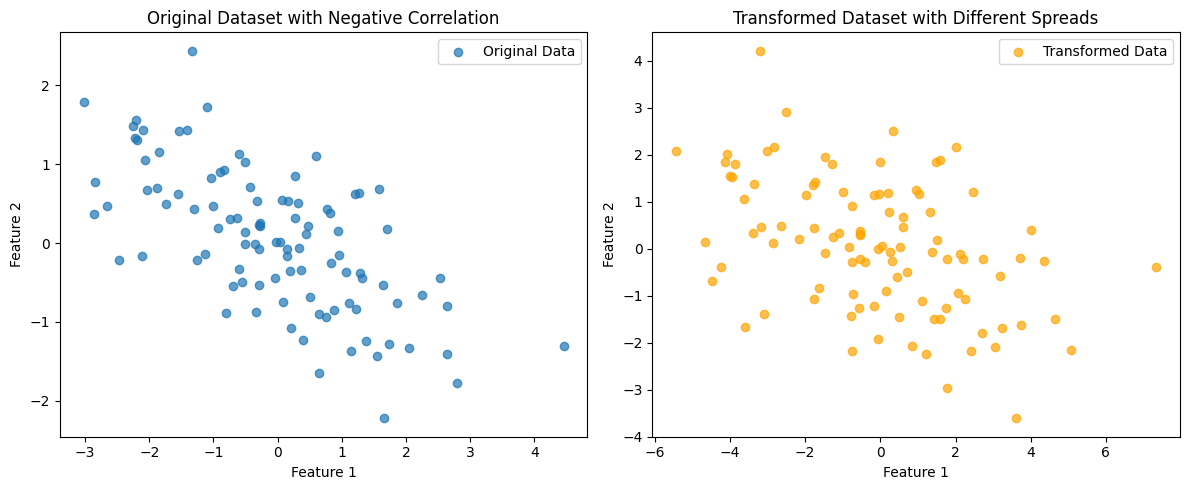

,Original Covariance Matrix,Transformed Covariance Matrix
"[0,0]",2.090100,6.184197
"[0,1]",-0.855327,-1.578497
"[1,0]",-0.855327,-1.578497
"[1,1]",0.793922,1.987559


In [6]:
# Step 1: Create a dataset with negative relationships and different spreads
mean = [0, 0]  # Center of the distribution
cov = [[2, -1], [-1, 1]]  # Covariance matrix with negative correlation
n_samples = 100
# Generate the dataset
data_negative = np.random.multivariate_normal(mean=mean, cov=cov, size=n_samples)
original_covariance_negative = np.cov(data_negative.T)

# Step 2: Apply a new transformation matrix with varying spreads
transformation_matrix_negative = np.array([[1.5, -0.5], [0.5, 2]])

# Transform the dataset
transformed_data_negative = data_negative @ transformation_matrix_negative.T
transformed_covariance_negative = np.cov(transformed_data_negative.T)

# Plot original and transformed datasets
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original dataset with negative correlation
ax[0].scatter(data_negative[:, 0], data_negative[:, 1], alpha=0.7, label="Original Data")
ax[0].set_title("Original Dataset with Negative Correlation")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

ax[0].legend()

# Transformed dataset
ax[1].scatter(transformed_data_negative[:, 0], transformed_data_negative[:, 1], alpha=0.7, color='orange', label="Transformed Data")
ax[1].set_title("Transformed Dataset with Different Spreads")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()

# Display covariance matrices
pd.DataFrame({
    "Original Covariance Matrix": original_covariance_negative.flatten(),
    "Transformed Covariance Matrix": transformed_covariance_negative.flatten()
}, index=["[0,0]", "[0,1]", "[1,0]", "[1,1]"])

In [10]:
data_negative[:10]

array([[-0.35893261, -0.01535209],
       [-0.55038199, -0.49506728],
       [ 0.2720012 ,  0.85551236],
       [-0.59532657, -0.32917657],
       [ 0.07677686, -0.74335464],
       [-2.07010439,  1.04805861],
       [ 0.14843139, -0.16781334],
       [ 1.05992988, -0.37141582],
       [-1.85480476,  1.15366424],
       [-2.20376917,  1.56238115]])

In [11]:
transformed_data_negative[:10]

array([[-0.53072287, -0.21017048],
       [-0.57803934, -1.26532556],
       [-0.01975438,  1.84702531],
       [-0.72840158, -0.95601643],
       [ 0.4868426 , -1.44832085],
       [-3.62918589,  1.06106503],
       [ 0.30655376, -0.26141099],
       [ 1.77560272, -0.2128667 ],
       [-3.35903926,  1.3799261 ],
       [-4.08684434,  2.02287772]])

## Covariance Matrix as a linear Transformation

The covariance matrix Σ encodes information about the spread and correlation of the data:

* Eigenvectors of Σ: Define the principal directions (axes) of the data distribution.
* Eigenvalues of Σ: Represent the amount of variance (spread) along those principal directions.

When we apply the covariance matrix Σ as a linear transformation to the dataset, the result is:

* Data will be stretched or compressed along the principal directions.
* Correlation between features will manifest geometrically as tilting or skewing of the dataset.

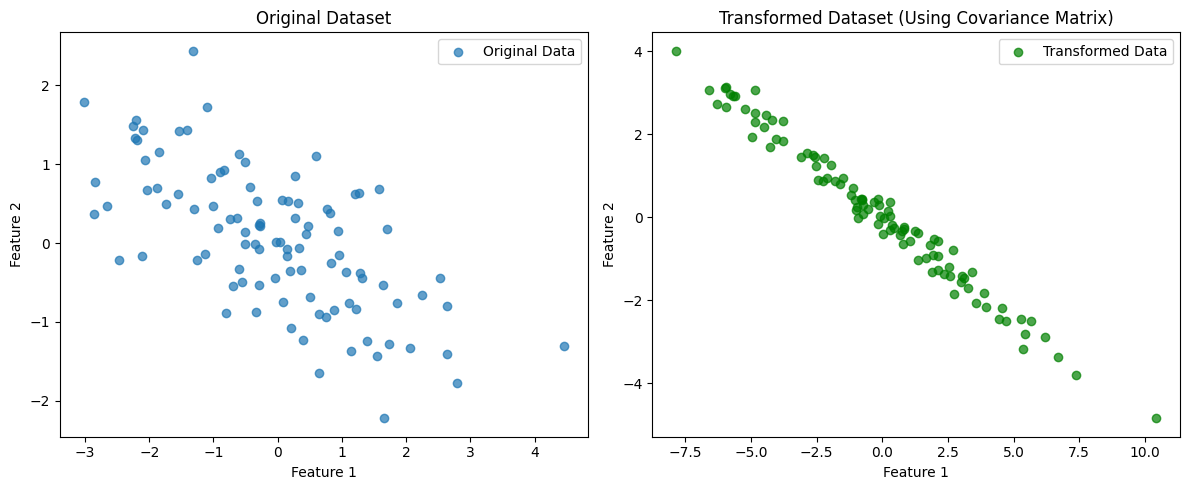

,Applied Covariance Matrix
"[0,0]",12.769637
"[0,1]",-6.320693
"[1,0]",-6.320693
"[1,1]",3.191148


In [12]:
# Step 1: Apply the original covariance matrix as a transformation
applied_covariance_transformation = data_negative @ original_covariance_negative.T

# Compute the covariance matrix of the new transformed dataset
applied_covariance_matrix = np.cov(applied_covariance_transformation.T)

# Plot original dataset and transformed dataset after applying covariance matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original dataset
ax[0].scatter(data_negative[:, 0], data_negative[:, 1], alpha=0.7, label="Original Data")
ax[0].set_title("Original Dataset")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].legend()

# Transformed dataset after applying covariance matrix
ax[1].scatter(applied_covariance_transformation[:, 0], applied_covariance_transformation[:, 1], alpha=0.7, color='green', label="Transformed Data")
ax[1].set_title("Transformed Dataset (Using Covariance Matrix)")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()

# Display the new covariance matrix of the transformed dataset
pd.DataFrame({
    "Applied Covariance Matrix": applied_covariance_matrix.flatten()
}, index=["[0,0]", "[0,1]", "[1,0]", "[1,1]"])


## Applying covariance matrix transformation n times on the same dataset ;

* Each transformation by the covariance matrix introduces further scaling and rotation of the dataset.
* The effect depends on the eigenvalues of the covariance matrix:
    * Eigenvalues >1: The corresponding eigenvector's direction will * keep expanding.
    * Eigenvalues <1: The corresponding eigenvector's direction will shrink towards zero.
    * Eigenvalues =1: No change along the corresponding direction.

* Asymptotic Behavior:

    * After many transformations, the data will predominantly align with the eigenvector corresponding to the largest eigenvalue. This is because the directions associated with smaller eigenvalues will shrink progressively.

* Geometric Interpretation:

 * The dataset will stretch along the dominant eigenvector's direction and collapse along others with smaller eigenvalues.

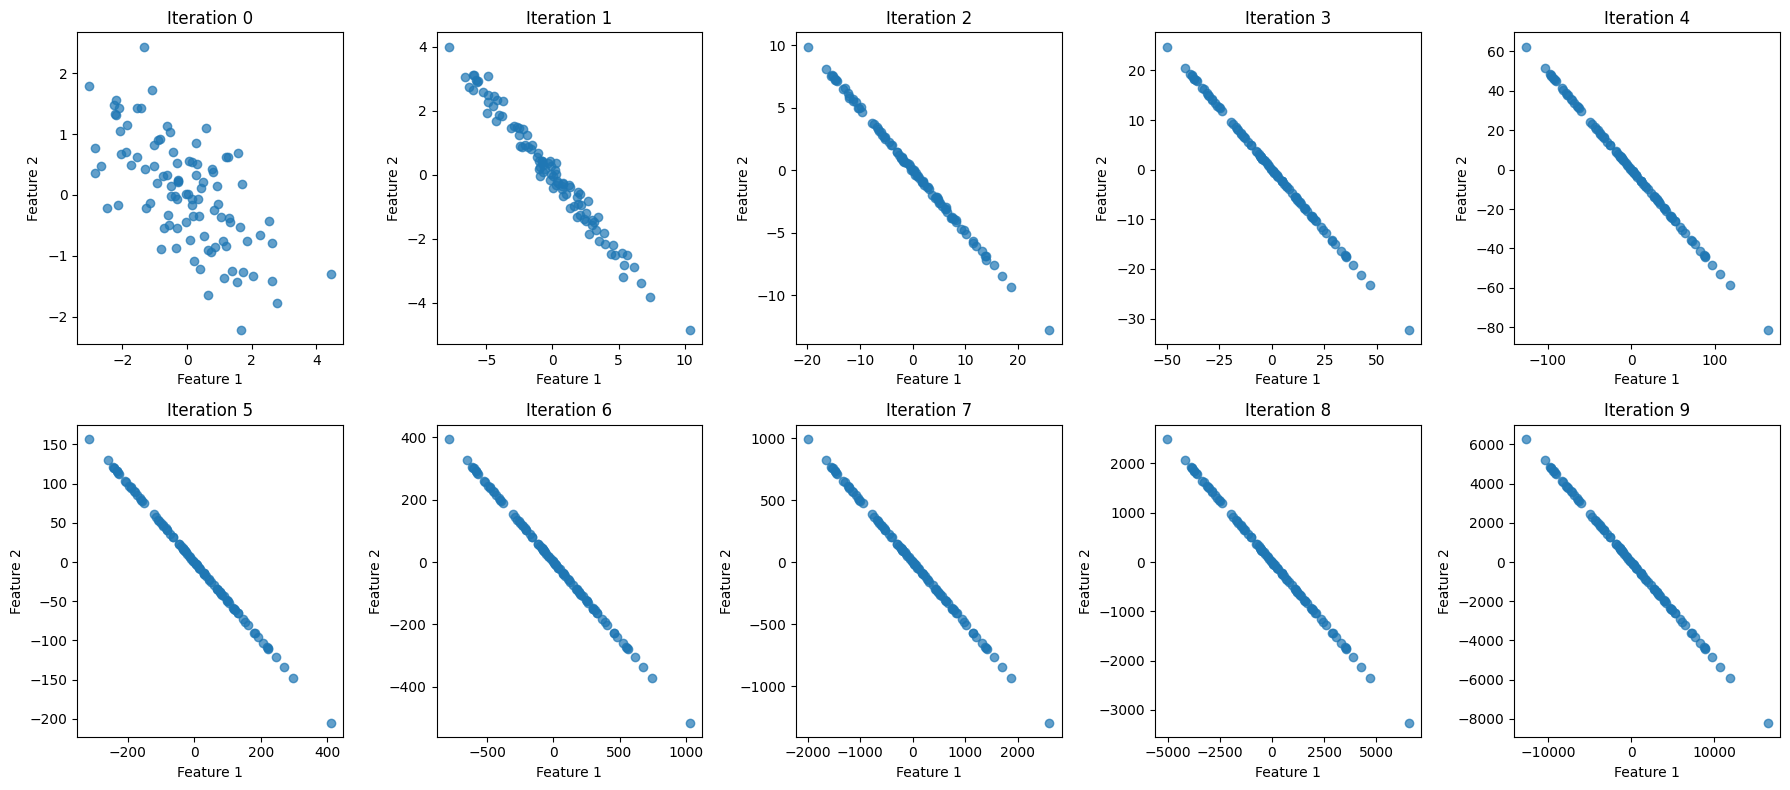

In [14]:
# Initialize variables for iterative transformation
iterative_data = data_negative.copy()
n_iterations = 10  # Number of transformations
all_transformed_states = [iterative_data]

# Apply the covariance matrix transformation iteratively
for _ in range(n_iterations):
    iterative_data = iterative_data @ original_covariance_negative.T
    all_transformed_states.append(iterative_data)

# Plot the evolution of the dataset through iterations
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for i in range(n_iterations + 1):
    try:
        ax = axes[i]
        ax.scatter(all_transformed_states[i][:, 0], all_transformed_states[i][:, 1], alpha=0.7)
        ax.set_title(f"Iteration {i}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
    except:
        pass

plt.tight_layout()
plt.show()


# EigenVectors are the Principal Components

### 1. What are Eigenvectors and Eigenvalues?

Given a square matrix $A$ of size $n \times n$, a non-zero vector $\mathbf{v}$ is an **eigenvector** of $A$ if it satisfies the following equation:

$A \mathbf{v} = \lambda \mathbf{v}$

Here:
- $A$ is the matrix we are considering,
- $\mathbf{v}$ is the eigenvector,
- $\lambda$ is the eigenvalue corresponding to the eigenvector $\mathbf{v}$.

The **eigenvalue** $\lambda$ is a scalar that indicates how much the eigenvector is stretched or compressed when the matrix is applied to it.

In simple terms, applying the transformation matrix $A$ to the eigenvector $\mathbf{v}$ results in a vector that is a scaled version of $\mathbf{v}$, where the scaling factor is $\lambda$.

### 2. Conditions for Eigenvectors

Not every matrix has eigenvectors. For a matrix to have eigenvectors, it needs to satisfy certain conditions, such as being square. However, not all square matrices will have real eigenvalues and eigenvectors. The matrix must be **diagonalizable** or at least **symmetric** for real eigenvectors and eigenvalues to exist.

### 3. What Does This Have to Do with Linear Transformations?

A **linear transformation** is a function that takes a vector and transforms it into another vector. Matrices are often used to represent linear transformations. If a vector $\mathbf{v}$ is an eigenvector of matrix $A$, applying the linear transformation defined by $A$ to $\mathbf{v}$ does not change its direction; it only scales it by the corresponding eigenvalue $\lambda$.

This is crucial because it means that the eigenvectors are special directions that the linear transformation $A$ leaves unchanged (except for scaling). Eigenvectors represent the directions along which the transformation behaves in a simple, predictable way, which is useful in various contexts like Principal Component Analysis (PCA).

### 4. Eigenvectors and Covariance Matrices

In the context of **Principal Component Analysis (PCA)**, the covariance matrix of the dataset is a square matrix that summarizes the relationships (covariances) between pairs of features in the dataset. The covariance matrix captures how much the features vary with respect to each other.

Let’s say we have a dataset $X$ where each column represents a feature, and each row represents an observation. The **covariance matrix** $\Sigma$ is defined as:

$$\Sigma = \frac{1}{n} X^T X$$

The goal in PCA is to reduce the dimensionality of the data while preserving as much variance as possible. This can be achieved by projecting the data onto a new set of axes, which are determined by the **principal components**.

#### The Principal Components:
- The principal components are the directions in which the data has the highest variance.
- These directions are given by the **eigenvectors** of the covariance matrix.
- The eigenvalues tell us the amount of variance explained by each eigenvector (i.e., how much "information" is captured by each principal component).

### 5. Proof Outline

#### Step 1: Covariance Matrix and Linear Transformation
For a dataset with zero mean, the covariance matrix $\Sigma$ captures how the data varies across different dimensions. When we perform PCA, we perform a linear transformation of the data. If we project the data onto the directions represented by the eigenvectors of $\Sigma$, we are maximizing the variance along those directions.

#### Step 2: Eigenvalue Decomposition
The eigenvectors of the covariance matrix are directions along which the data varies most. To see this, we consider the **eigenvalue decomposition** of the covariance matrix $\Sigma$:

$$\Sigma \mathbf{v} = \lambda \mathbf{v}$$

This equation shows that applying the transformation defined by $\Sigma$ to the eigenvector $\mathbf{v}$ results in scaling the vector by $\lambda$.

#### Step 3: Maximizing Variance
In PCA, we want to find the directions (principal components) that maximize the variance of the data. Mathematically, the variance along a direction is maximized by finding the eigenvectors of the covariance matrix. When we project the data onto these eigenvectors, the variance along each eigenvector corresponds to the eigenvalue $\lambda$.

Thus, the principal components correspond to the eigenvectors of the covariance matrix, and the eigenvalues tell us how much variance is captured by each principal component.

### 6. Conclusion

The **eigenvectors of the covariance matrix** represent the **principal components** of the dataset. These are the directions along which the data has the highest variance. The corresponding eigenvalues tell us the amount of variance captured by each principal component. The reason for this is that the covariance matrix encapsulates how the features in the dataset relate to each other, and the eigenvectors represent the directions in which the data spreads the most.

### 7. Summary

- Eigenvectors are directions that remain unchanged under linear transformations (except for scaling).
- The covariance matrix describes how data varies along different dimensions.
- The eigenvectors of the covariance matrix correspond to the directions of maximum variance (the principal components).
- The eigenvalues indicate how much variance is explained by each principal component.


# Vector Projections

### 1. What is Vector Projection?

The **projection** of one vector onto another is a way to represent the first vector in terms of the second vector. Mathematically, given two vectors, $ \mathbf{a} $ and $ \mathbf{b} $, the projection of $ \mathbf{a} $ onto $ \mathbf{b} $ is a vector that represents how much of $ \mathbf{a} $ lies in the direction of $ \mathbf{b} $.

The **projection of vector $ \mathbf{a} $ onto vector $ \mathbf{b} $** is given by:

$$
\text{proj}_{\mathbf{b}} \mathbf{a} = \frac{\mathbf{a} \cdot \mathbf{b}}{\mathbf{b} \cdot \mathbf{b}} \mathbf{b}
$$

Where:
- $ \mathbf{a} \cdot \mathbf{b} $ is the **dot product** of vectors $ \mathbf{a} $ and $ \mathbf{b} $,
- $ \mathbf{b} \cdot \mathbf{b} $ is the dot product of $ \mathbf{b} $ with itself (i.e., the square of the magnitude of $ \mathbf{b} $).

### 2. Geometric Interpretation of Projection

In geometrical terms, the projection of $ \mathbf{a} $ onto $ \mathbf{b} $ represents the shadow of $ \mathbf{a} $ when "light" is cast along the direction of $ \mathbf{b} $. The resulting vector is the closest approximation to $ \mathbf{a} $ that lies along the line defined by $ \mathbf{b} $.

If $ \mathbf{a} $ and $ \mathbf{b} $ are orthogonal, the projection will be zero, meaning there is no component of $ \mathbf{a} $ in the direction of $ \mathbf{b} $.

### 3. Vector Projections in Principal Component Analysis (PCA)

In PCA, **vector projections** are used to project the original data points onto the principal components (the eigenvectors of the covariance matrix). Here’s how vector projections play a key role in PCA:

#### Step-by-Step Role of Projections in PCA:

1. **Covariance Matrix and Principal Components:**
   - The first step in PCA is to compute the **covariance matrix** of the dataset. This matrix encapsulates the variance and covariance of the features in the dataset.
   - The next step is to compute the **eigenvectors** and **eigenvalues** of the covariance matrix. The eigenvectors represent the **principal components**, and the eigenvalues represent the variance captured by each principal component.

2. **Data Transformation:**
   - Each data point in the dataset is a vector in the original feature space. To reduce the dimensionality, we need to project these data points onto the new set of axes (the principal components).
   - This is done by performing a **linear transformation**, where each data point is projected onto the eigenvectors (principal components).
   
   The projection of a data point $ \mathbf{x} $ onto the principal component $ \mathbf{v} $ is computed as:

   $$
   \text{proj}_{\mathbf{v}} \mathbf{x} = \frac{\mathbf{x} \cdot \mathbf{v}}{\mathbf{v} \cdot \mathbf{v}} \mathbf{v}
   $$

   This gives a new representation of the data point $ \mathbf{x} $ along the direction of the principal component $ \mathbf{v} $.

3. **Dimensionality Reduction:**
   - By projecting the data onto the first few principal components (those with the largest eigenvalues), you retain the directions of maximum variance in the dataset.
   - The result is a reduced-dimensional representation of the data, where the first few components capture the most important features of the data, while the less important features (along the smaller eigenvectors) are discarded.

#### Example:

Suppose you have a 2D dataset and you want to reduce it to 1D using PCA. After computing the covariance matrix, you find that the first principal component (first eigenvector) explains most of the variance. By projecting the data onto this eigenvector, you obtain a 1D representation of the data along the direction that maximizes the variance.

### 4. Why Projections are Key in PCA?

- **Maximizing Variance:** The principal components are the directions where the data varies the most. Projecting the data onto these directions ensures that you are preserving the maximum amount of information (variance) in the lower-dimensional representation.
- **Dimensionality Reduction:** By projecting data onto a reduced set of principal components, you are effectively reducing the number of dimensions needed to describe the data while maintaining the most important features.

### 5. Orthogonality of Principal Components

An important property in PCA is that the **principal components are orthogonal** to each other. This means that each principal component captures variance in a direction that is independent of the others. This orthogonality simplifies the projection process because projecting onto one principal component doesn’t affect the projections onto others.

### 6. Relation to Singular Value Decomposition (SVD)

PCA can also be understood in terms of **Singular Value Decomposition (SVD)**. SVD is a matrix factorization technique that decomposes a matrix into three components:
- The left singular vectors (which correspond to the eigenvectors of the data matrix),
- The singular values (which are related to the eigenvalues),
- The right singular vectors.

In PCA, performing SVD on the data matrix is equivalent to finding the principal components and performing the projections.

### 7. Summary of Vector Projections in PCA

- **Projection** is the process of mapping data points onto a new space defined by the principal components.
- **PCA** works by projecting the data onto eigenvectors (principal components), which are directions of maximum variance.
- **Dimensionality reduction** in PCA is achieved by keeping only the projections along the most important principal components.
- **Orthogonality** of the principal components ensures that the projections are independent and capture unique aspects of the data's variance.


# Multi-Variate Gaussian Distribution

### 1. **Understanding the Inverse of a Matrix Intuitively**

The **inverse of a matrix** is a concept that can be thought of as the "opposite" of multiplying by the matrix. Let's break it down intuitively:

- Imagine you have a matrix $ A $ that transforms or maps vectors from one space to another. When you multiply a vector $ \mathbf{x} $ by $ A $, you get a new vector $ \mathbf{y} = A\mathbf{x} $.
  
- The **inverse matrix** $ A^{-1} $ undoes the effect of $ A $. In other words, when you multiply a vector $ \mathbf{y} $ by $ A^{-1} $, you recover the original vector $ \mathbf{x} $. This is written as:

$$
A^{-1}A\mathbf{x} = \mathbf{x}
$$

- To better understand this, think of it like a function. If $ A $ is a function that takes you from one place to another, $ A^{-1} $ is the function that takes you back to your original position. This concept is similar to taking two steps: going forward with $ A $ and then reversing that with $ A^{-1} $.

- **Matrix multiplication and inverses** are only possible when the matrix is **square** (same number of rows and columns), and the matrix must be **non-singular**, meaning it has a non-zero determinant. If the determinant is zero, the matrix does not have an inverse (this is called a **singular matrix**).

### 2. **Understanding the Multivariate Gaussian Distribution**

The **multivariate Gaussian distribution** (or **multivariate normal distribution**) is a generalization of the normal (Gaussian) distribution to higher dimensions. In the univariate case, the Gaussian distribution is characterized by its mean $ \mu $ and variance $ \sigma^2 $. In the multivariate case, we generalize this to higher dimensions, where the distribution is characterized by a **mean vector** and a **covariance matrix**.

#### Key Concepts:
- **Mean vector** $ \mu $: This is a vector representing the "center" of the distribution, i.e., the point where the highest probability density occurs. In two dimensions, it's a point in the plane, and in higher dimensions, it's a vector in the feature space.
- **Covariance matrix** $ \Sigma $: This matrix represents the spread and orientation of the distribution. The diagonal elements of $ \Sigma $ represent the variances of each dimension, and the off-diagonal elements represent the covariances between pairs of dimensions.

The probability density function (PDF) for a multivariate normal distribution is given by:

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2} (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu) \right)
$$

Where:
- $ \mathbf{x} $ is a vector representing a point in the space.
- $ \mu $ is the mean vector.
- $ \Sigma $ is the covariance matrix.
- $ d $ is the number of dimensions.
- $ |\Sigma| $ is the determinant of $ \Sigma $, which measures the "volume" of the distribution.
- $ \Sigma^{-1} $ is the inverse of the covariance matrix, which controls the orientation of the distribution.

#### Intuition Behind the Formula:
- The **exponential term** represents how far a point $ \mathbf{x} $ is from the mean $ \mu $ in terms of the covariance matrix $ \Sigma $. If a point is far from the mean, the probability density is low, and if it's close to the mean, the probability density is high.
- The **determinant of $ \Sigma $** determines the "spread" of the distribution. A larger determinant means that the distribution is more spread out, while a smaller determinant means the distribution is more concentrated around the mean.
- The **inverse of $ \Sigma $** (i.e., $ \Sigma^{-1} $) plays a role in how the distribution is stretched or compressed along different dimensions. It controls the shape and orientation of the ellipsoid of high probability density.

### 3. **Example: Multivariate Gaussian Distribution in 2D**

Let’s consider a simple example in 2D with the following parameters:
- Mean vector: $ \mu = \begin{bmatrix} 3 \\ 2 \end{bmatrix} $
- Covariance matrix: $ \Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix} $

This defines a 2D Gaussian distribution where the mean is at the point $ (3, 2) $ in the plane. The covariance matrix $ \Sigma $ has the following properties:
- The diagonal elements $ 1 $ represent the variances in the $ x $- and $ y $-directions (both equal in this case).
- The off-diagonal element $ 0.5 $ represents the **covariance** between the $ x $- and $ y $-dimensions. Since it’s positive, this indicates that $ x $ and $ y $ tend to increase or decrease together.

The shape of this distribution is an **ellipsoid**, where the axes are aligned with the principal directions of the covariance. The orientation and "spread" of the ellipsoid are determined by the covariance matrix $ \Sigma $.

To visualize this:
1. The **mean vector** $ \mu = \begin{bmatrix} 3 \\ 2 \end{bmatrix} $ represents the center of the distribution.
2. The covariance matrix $ \Sigma $ influences the **spread** of the distribution. Since the covariance matrix has off-diagonal elements, the distribution is not axis-aligned; instead, it is rotated.

#### Sampling from the Multivariate Normal Distribution:
If you want to generate points from this distribution, you can sample from the 2D multivariate normal distribution using the formula:

$$
\mathbf{x} = \mu + L \cdot \mathbf{z}
$$

Where:
- $ \mathbf{z} $ is a vector of independent standard normal random variables (with mean 0 and variance 1),
- $ L $ is the **Cholesky decomposition** of the covariance matrix $ \Sigma $. It transforms the unit Gaussian samples into the desired covariance structure.

### 4. **Summary:**
- The **inverse of a matrix** "undoes" the transformation applied by the matrix, and this is useful in many applications, such as in the multivariate Gaussian distribution, where the inverse of the covariance matrix determines the shape and orientation of the distribution.
- The **multivariate Gaussian distribution** generalizes the normal distribution to multiple dimensions, with the mean vector representing the center and the covariance matrix determining the spread and orientation of the distribution. The PDF involves the inverse of the covariance matrix, which controls the shape of the distribution.


# Transformation with the Inverse of the Covariance Matrix

### 1. **Transformation with the Inverse of the Covariance Matrix**

In the multivariate Gaussian distribution, the covariance matrix \( \Sigma \) describes how the features (dimensions) of the data are related to each other. The inverse of the covariance matrix \( \Sigma^{-1} \) is critical in transforming the data in such a way that we can better understand its structure and correlations.

The key part of the probability density function (PDF) of the multivariate Gaussian distribution involves the transformation:

$$
\exp\left( -\frac{1}{2} (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu) \right)
$$

This term involves the **Mahalanobis distance**, which is essentially the distance between a point \( \mathbf{x} \) and the mean vector \( \mu \) after applying a linear transformation determined by \( \Sigma^{-1} \). Let’s break this down intuitively and understand the role of \( \Sigma^{-1} \).

### 2. **Intuitive Explanation of the Transformation**

- **Covariance Matrix \( \Sigma \)**: The covariance matrix describes how the features vary with respect to each other. If you imagine the data as a cloud of points in some multidimensional space, \( \Sigma \) tells you the **spread** and **orientation** of the data. If the features are highly correlated, the data will stretch along a certain direction in the space.

- **Inverse Covariance Matrix \( \Sigma^{-1} \)**: When you apply the inverse of the covariance matrix, you are essentially transforming the data so that the covariance matrix of the transformed data becomes the identity matrix. In other words, the inverse of the covariance matrix removes any **correlation** between the dimensions and makes them independent.

#### **What happens when we apply the inverse covariance matrix?**

1. **Normalization**: Applying \( \Sigma^{-1} \) "normalizes" the data in such a way that the axes become aligned with the **principal axes of the distribution**. In simpler terms, it "straightens" the ellipsoid (which is the shape of the distribution) into a sphere, where each axis of the sphere corresponds to an independent feature. This transformation allows you to view the distribution as if the data were **spherically distributed**, with each dimension having equal variance.

2. **Ellipsoid to Sphere**: The covariance matrix \( \Sigma \) defines the spread and orientation of the data. If \( \Sigma \) is not diagonal, the data is elongated in certain directions, creating an ellipsoid. The inverse of the covariance matrix \( \Sigma^{-1} \) rotates and scales the data such that the covariance matrix becomes the identity matrix, i.e., the data becomes **spherically distributed**. This makes it easier to analyze the data, as you can think of it in terms of independent dimensions.

3. **Decoupling the Correlations**: If the features in the data are correlated, the covariance matrix will have non-zero off-diagonal elements. Applying the inverse covariance matrix decouples the features, making them uncorrelated. After this transformation, each dimension will have variance equal to 1, and the features will be independent. This decoupling is useful because many machine learning and statistical techniques, including principal component analysis (PCA), are based on the assumption of uncorrelated features.

### 3. **Mathematical Viewpoint:**
When you apply the inverse covariance matrix \( \Sigma^{-1} \), you are effectively transforming the original space in such a way that the new "space" corresponds to a **standardized** version of the original space. Mathematically, this transformation is equivalent to performing a **whitening** operation, which makes the data's covariance matrix become the identity matrix.

The Mahalanobis distance, which appears in the exponent of the multivariate Gaussian PDF, can be thought of as the "distance" of a point \( \mathbf{x} \) from the mean \( \mu \), adjusted for the spread of the data. This distance is:

$$
D_{\text{Mahalanobis}} = (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu)
$$

The Mahalanobis distance gives you a measure of how many standard deviations away a point \( \mathbf{x} \) is from the mean \( \mu \), considering the correlations between features. The inverse covariance matrix \( \Sigma^{-1} \) adjusts for these correlations, ensuring that the distance is properly scaled in each direction.

### 4. **Effect on Multivariate Gaussian Distribution**
Let's now look at the effect of the inverse covariance matrix on the Gaussian distribution.

#### Original Distribution (before applying \( \Sigma^{-1} \)):

The PDF of the multivariate Gaussian distribution is:

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2} (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu) \right)
$$

This involves the inverse of \( \Sigma \), which controls how the probability density is shaped. The covariance matrix \( \Sigma \) describes the spread and orientation of the data.

#### After Transformation (whitening or normalization):

After applying \( \Sigma^{-1} \) to transform the data, the distribution becomes:

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{d/2}} \exp\left( -\frac{1}{2} \mathbf{z}^T \mathbf{z} \right)
$$

Where \( \mathbf{z} \) is the transformed vector after applying \( \Sigma^{-1} \). This transformation results in a **spherical Gaussian distribution** where the data is now independent in each dimension, and the covariance matrix is now the identity matrix.

### 5. **Summary of the Transformation with the Inverse Covariance Matrix:**

- **The inverse covariance matrix** is used to normalize and decorrelate the data. It transforms the data so that the covariance matrix becomes the identity matrix, which means that the features become independent and have unit variance.
- **This transformation** makes the data spherically distributed in the transformed space, simplifying the analysis and making it easier to apply statistical techniques like PCA, where the goal is to find uncorrelated, independent components.
- The transformation via \( \Sigma^{-1} \) is essential for understanding how the data is structured, especially in multivariate Gaussian distributions, where it plays a central role in shaping the probability density function.


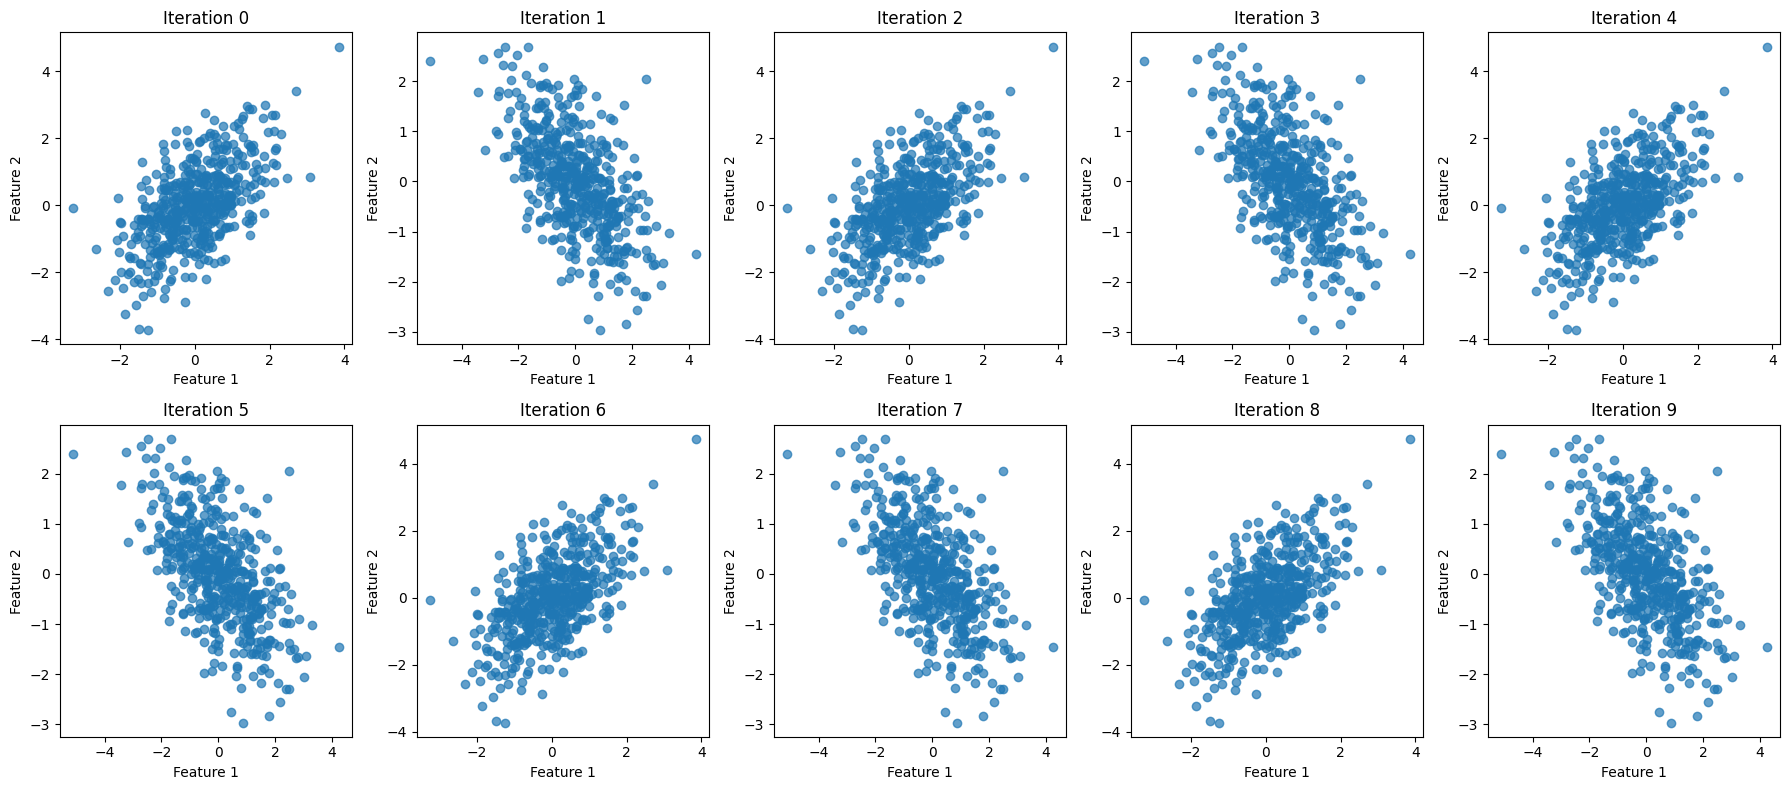

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate the sample data with positive and negative correlations
n_samples = 500

# Create two correlated features: x1 and x2
x1 = np.random.normal(0, 1, n_samples)
x2 = 0.8 * x1 + np.random.normal(0, 1, n_samples)  # Positive correlation with some noise

# Create the data matrix (n_samples x 2)
data = np.column_stack((x1, x2))

# Step 2: Compute the covariance matrix
original_covariance = np.cov(data, rowvar=False)

# Step 3: Initialize variables for iterative transformation
iterative_data = data - np.mean(data, axis=0)  # Center the data by subtracting the mean
n_iterations = 10  # Number of transformations
all_transformed_states = [iterative_data]

# Step 4: Apply the inverse covariance matrix transformation iteratively
for _ in range(n_iterations):
    # Compute the inverse covariance matrix at each iteration
    inv_cov_matrix = np.linalg.inv(np.cov(iterative_data, rowvar=False))

    # Apply the inverse covariance matrix to the data
    iterative_data = iterative_data @ inv_cov_matrix
    all_transformed_states.append(iterative_data)

# Step 5: Plot the evolution of the dataset through iterations
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for i in range(n_iterations + 1):
    try:
        ax = axes[i]
        ax.scatter(all_transformed_states[i][:, 0], all_transformed_states[i][:, 1], alpha=0.7)
        ax.set_title(f"Iteration {i}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
    except:
        pass

plt.tight_layout()
plt.show()


<ipython-input-19-b2417df8b3a7>:28: RuntimeWarning: overflow encountered in matmul
  iterative_data = iterative_data @ covariance_matrix
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


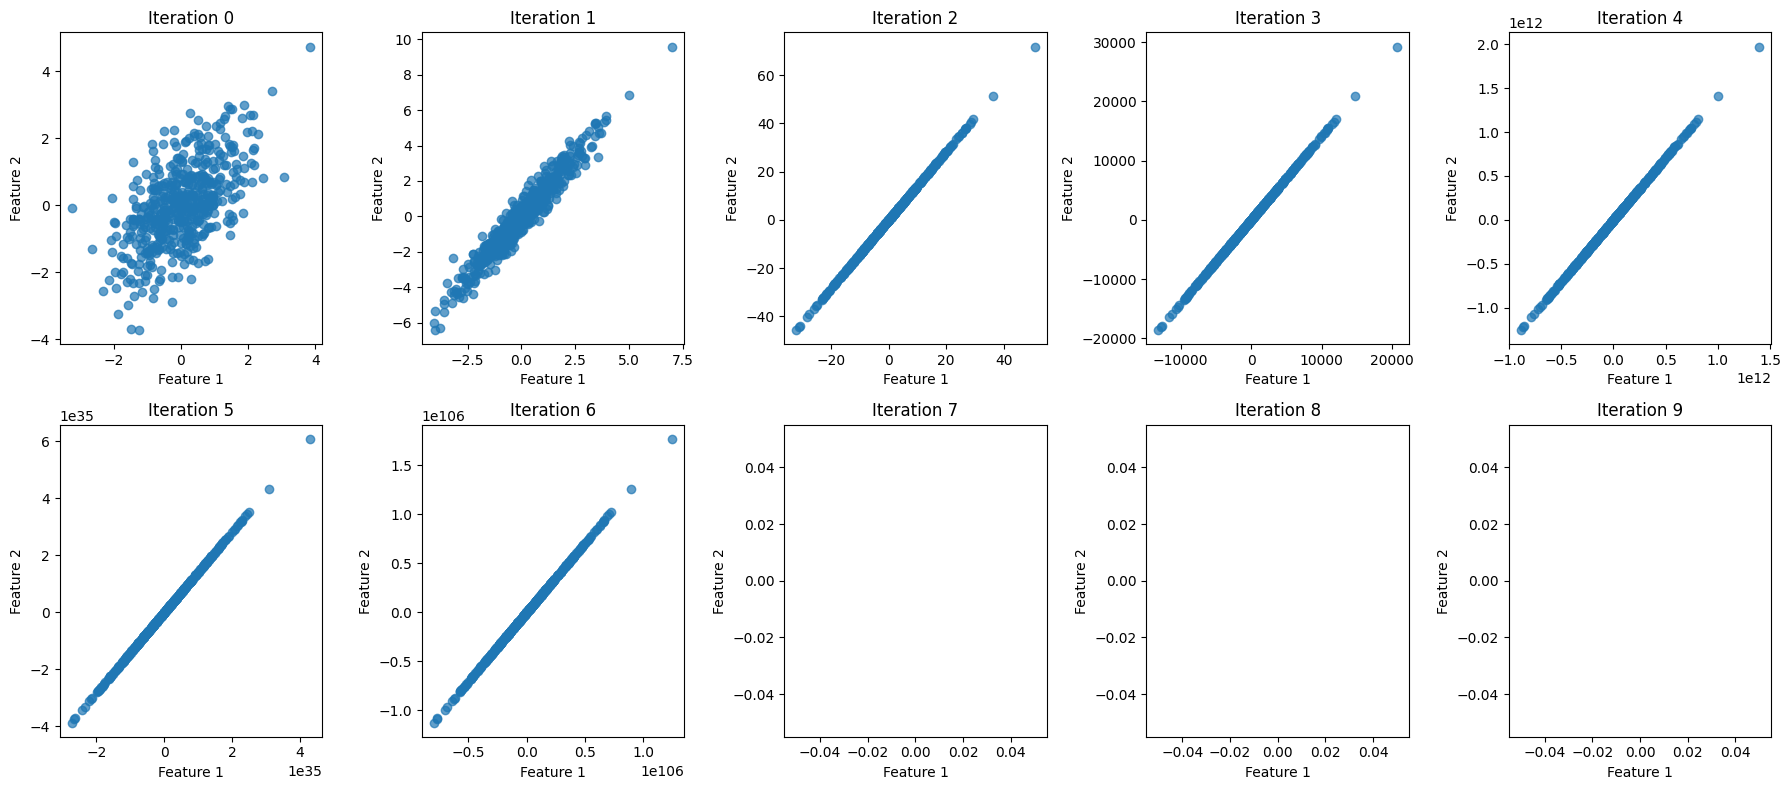

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate the sample data with positive and negative correlations
n_samples = 500

# Create two correlated features: x1 and x2
x1 = np.random.normal(0, 1, n_samples)
x2 = 0.8 * x1 + np.random.normal(0, 1, n_samples)  # Positive correlation with some noise

# Create the data matrix (n_samples x 2)
data = np.column_stack((x1, x2))

# Step 2: Initialize variables for iterative transformation
iterative_data = data - np.mean(data, axis=0)  # Center the data by subtracting the mean
n_iterations = 10  # Number of transformations
all_transformed_states = [iterative_data]

# Step 3: Apply the covariance matrix transformation iteratively
for _ in range(n_iterations):
    # Compute the covariance matrix at each iteration
    covariance_matrix = np.cov(iterative_data, rowvar=False)

    # Apply the inverse covariance matrix to the data
    iterative_data = iterative_data @ covariance_matrix

    # Store the transformed data
    all_transformed_states.append(iterative_data)

# Step 4: Plot the evolution of the dataset through iterations
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for i in range(n_iterations + 1):
    try:
        ax = axes[i]
        ax.scatter(all_transformed_states[i][:, 0], all_transformed_states[i][:, 1], alpha=0.7)
        ax.set_title(f"Iteration {i}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
    except:
        pass

plt.tight_layout()
plt.show()


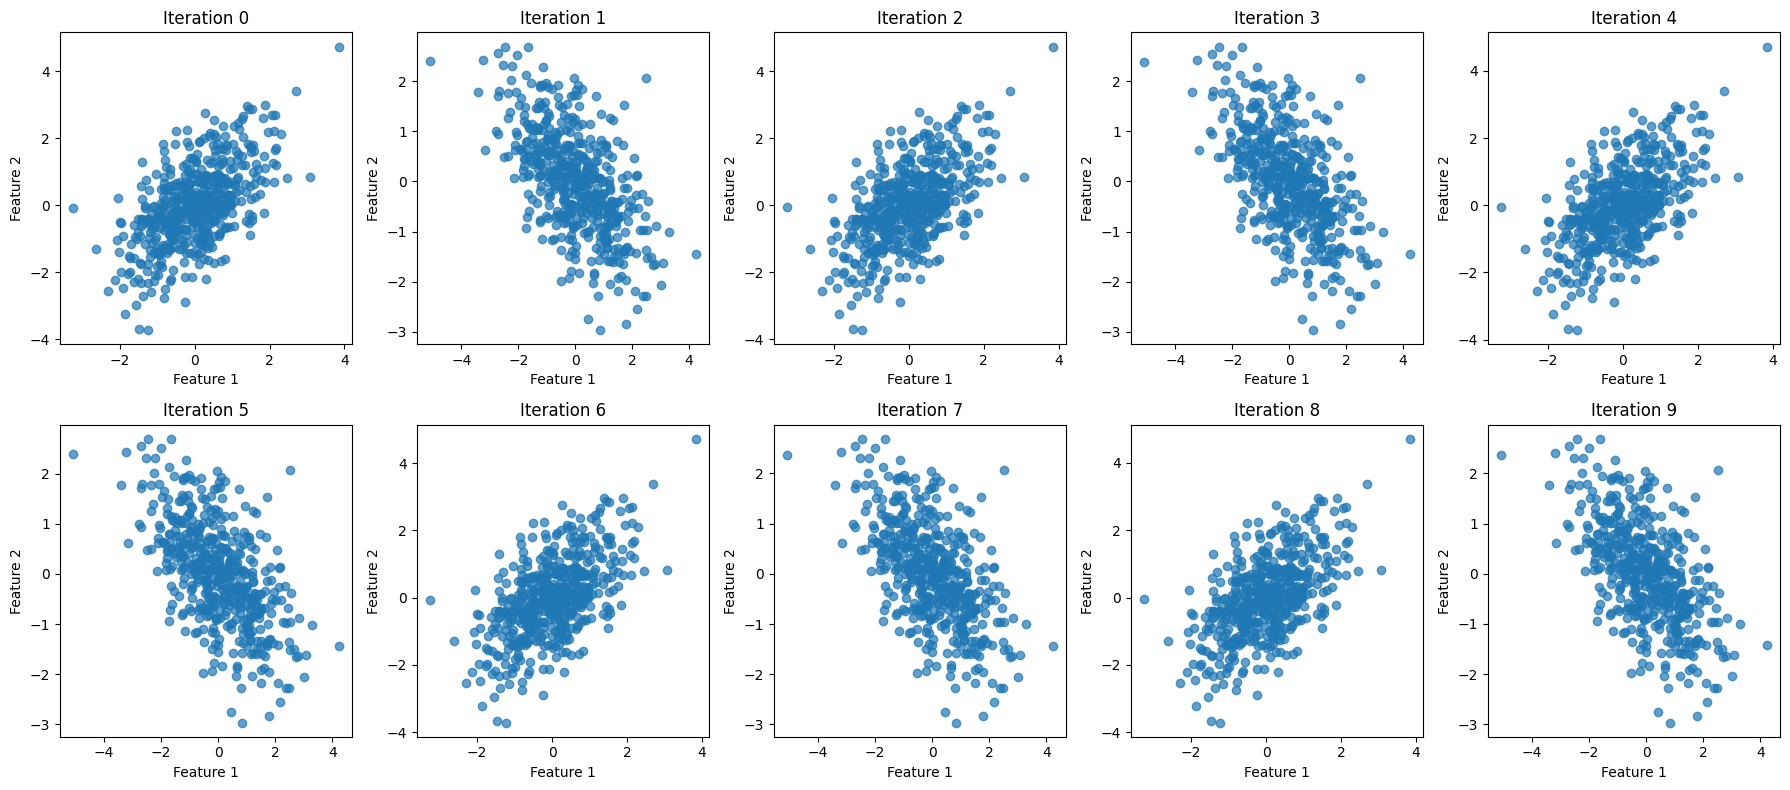

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate the sample data with positive and negative correlations
n_samples = 500

# Create two correlated features: x1 and x2
x1 = np.random.normal(0, 1, n_samples)
x2 = 0.8 * x1 + np.random.normal(0, 1, n_samples)  # Positive correlation with some noise

# Create the data matrix (n_samples x 2)
data = np.column_stack((x1, x2))

# Step 2: Initialize variables for iterative transformation
iterative_data = data - np.mean(data, axis=0)  # Center the data by subtracting the mean
n_iterations = 10  # Number of transformations
all_transformed_states = [iterative_data]

# Step 3: Apply the inverse covariance matrix transformation iteratively
for _ in range(n_iterations):
    # Compute the covariance matrix at each iteration
    covariance_matrix = np.cov(iterative_data, rowvar=False)

    # Regularize the covariance matrix by adding a small value to the diagonal (identity matrix)
    regularization_factor = 1e-3  # Larger regularization factor to avoid singular matrices
    regularized_covariance_matrix = covariance_matrix + regularization_factor * np.eye(covariance_matrix.shape[0])

    # Compute the inverse of the regularized covariance matrix
    inv_cov_matrix = np.linalg.inv(regularized_covariance_matrix)

    # Apply the inverse covariance matrix to the data
    iterative_data = iterative_data @ inv_cov_matrix

    # Store the transformed data
    all_transformed_states.append(iterative_data)

# Step 4: Plot the evolution of the dataset through iterations
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for i in range(n_iterations + 1):
    try:
        ax = axes[i]
        ax.scatter(all_transformed_states[i][:, 0], all_transformed_states[i][:, 1], alpha=0.7)
        ax.set_title(f"Iteration {i}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
    except:
        pass

plt.tight_layout()
plt.show()
